## Exercício 1

Analisar a série temporal de produção mensal de sorvete entre 1972 e 2020 e então responder à pergunta abaixo:

1- Essa série temporal é estacionária ou não estacionária? Apresente o resultado da sua análise para justificar sua resposta.

O dataset fornecido a você é uma versão simplificada do dataset Icecream, resultado de um estudo realizado nos EUA:

https://rdrr.io/rforge/Ecdat/man/Index.Time.Series.html

### Preparação das bibliotecas

In [3]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [ ]:
# Instala o pacote yfinance
!pip install -q yfinance

In [ ]:
# Atualiza o pacote Pandas
!pip install -q -U pandas

In [ ]:
# Atualiza o pacote Statsmodels
!pip install -q -U statsmodels

In [14]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import yfinance as yf

# Imports para análise de dados
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

pandas          1.0.4
matplotlib      3.2.1
numpy           1.18.4
statsmodels     0.11.1
yfinance        0.1.54
seaborn         0.10.1
statsmodels.api 0.11.1



### Carregando e Preparando os Dados

Vamos carregar os dados e prepará-los para mais uma rodada de análise.

In [6]:
# Carrega os dados
dados_serie = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset2.csv')

In [7]:
# Série
dados_serie.head()

,DATE,NUMBER
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [8]:
# Ajusta o nome das colunas
dados_serie.rename(columns = {'DATE':'data', 'NUMBER':'producao'}, inplace = True)

In [9]:
# Converte a data no formato apropriado
dados_serie['data'] = pd.to_datetime(dados_serie['data'], format = '%Y-%m')

In [10]:
# Série
dados_serie.head()

,data,producao
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [11]:
# Definindo a data como índice da série
dados_serie = dados_serie.set_index('data')

In [12]:
dados_serie.head()

,producao
data,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


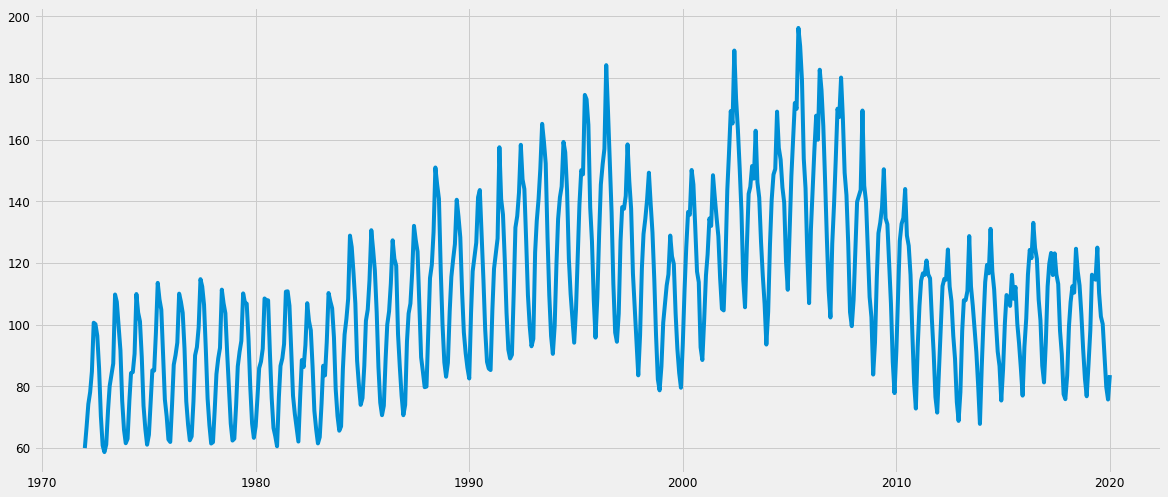

In [15]:
# Plot da série Original dos dados.
plt.plot(dados_serie)

In [17]:
# Função para testar a estacionaridade baseado em uma média movel de 12 unidades
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

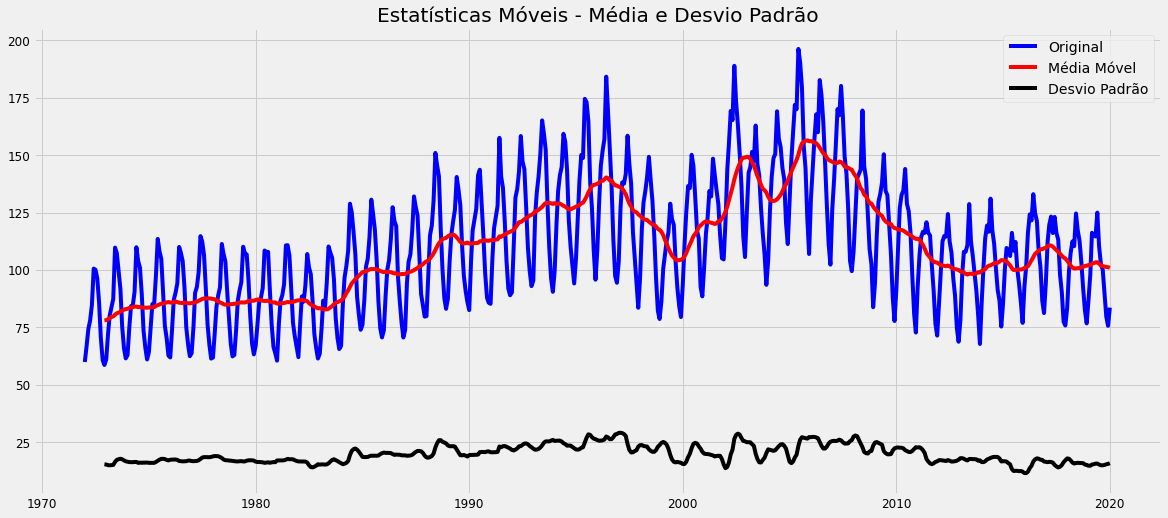


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.758009
Valor-p                           0.401499
Número de Lags Consideradas      19.000000
Número de Observações Usadas    557.000000
Valor Crítico (1%)               -3.442145
Valor Crítico (5%)               -2.866743
Valor Crítico (10%)              -2.569541
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [18]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
testa_estacionaridade(dados_serie.producao)

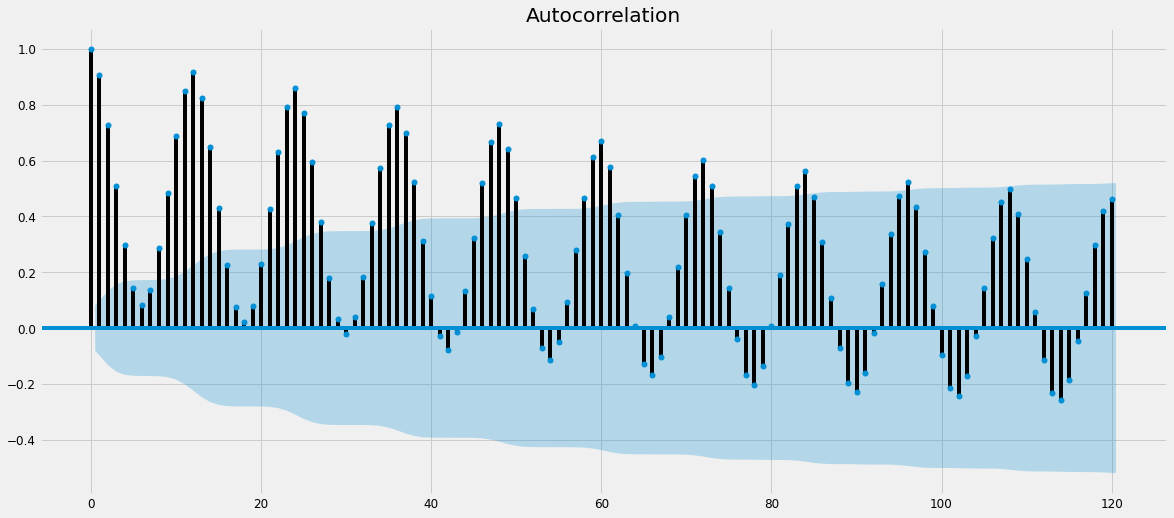

In [19]:
# Plots
# Plot do gráfico ACF

# A autocorrelação é a correlação de uma série temporal com uma cópia atrasada de si mesma.

# Testando a hipótese nula de que a correlação da série com a sua defasagem é igual a zero, podemos rejeitá-la 
# sempre que o nível de correlação estiver acima ou abaixo da área azul, com um nível de significância de 5%. 

# Com base na deterioração do ACF, provavelmente estamos lidando com um processo de regressão automática.

# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
acf = plot_acf(dados_serie.producao, lags = 120)

# BASEADO NO VALOR -P E NO COMPORTAMENTO DA MÉDIA E VARIÂNCIA NÃO SEREM CONSTANTES AO LONGO DO TEMPO, PODEMOS CONCLUIR QUE A SÉRIE NÃO É ESTACIONÁRIA.